In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
btr = pd.read_csv('btr_data.csv')
btr.head()

,country,university,type,gender,race,uni_rank,uni_gender,presenter,session
0,United States of America,Carnegie Mellon University,uni,0,5,26,0.39,1,1
1,Japan,University of Tokyo,uni,1,2,33,-1.00,0,1
2,United States of America,Amazon Inc.,priv,0,1,-1,-1.00,0,1
3,United States of America,Argonne National Laboratory,uni,0,11,-1,-1.00,1,1
4,United States of America,Argonne National Laboratory,uni,0,6,-1,-1.00,0,1


Create plot of btr data by gender- authors

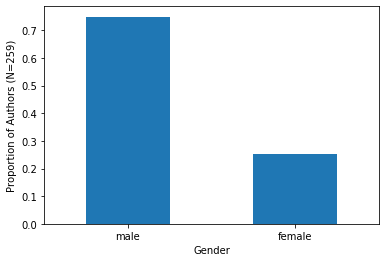

In [3]:
grbtr = btr.groupby('gender').count()['uni_rank'] / btr.shape[0]
ax = grbtr.plot.bar()
ax.set_xticklabels(['male','female'], rotation=0);
ax.set_xlabel('Gender');
ax.set_ylabel('Proportion of Authors (N=259)');

Create plot of btr data by gender- presenters

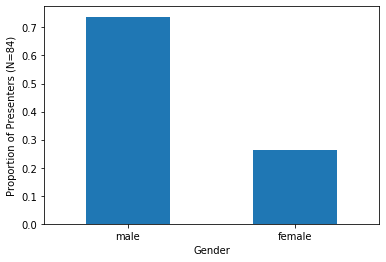

In [4]:
btr_pres = btr[btr.presenter==1]
grbtr = btr_pres.groupby('gender').count()['uni_rank'] / btr_pres.shape[0]

ax = grbtr.plot.bar()
ax.set_xticklabels(['male','female'], rotation=0);
ax.set_xlabel('Gender');
ax.set_ylabel('Proportion of Presenters (N=84)');

Compare samples between COVID session and other sessions (no difference found)

In [5]:
count = btr.groupby('session').sum()['gender'].values
nobs = btr.groupby('session').count()['gender'].values
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.398


Authors by country

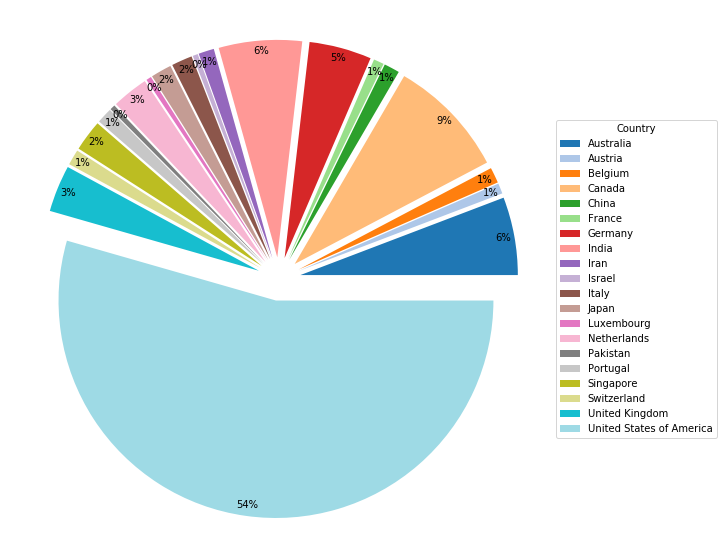

In [6]:
grbtr = btr.groupby('country').count()['uni_rank']
ncountry = grbtr.shape[0]
explode = 0.1*np.ones(ncountry)

ax = grbtr.plot.pie(figsize=(10,10),
                    explode=explode,
                    autopct='%1.0f%%', 
                    pctdistance=0.95, 
                    labeldistance=None,
                    colormap='tab20')
ax.set_ylabel('');
ax.legend(title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1));

Authors by race

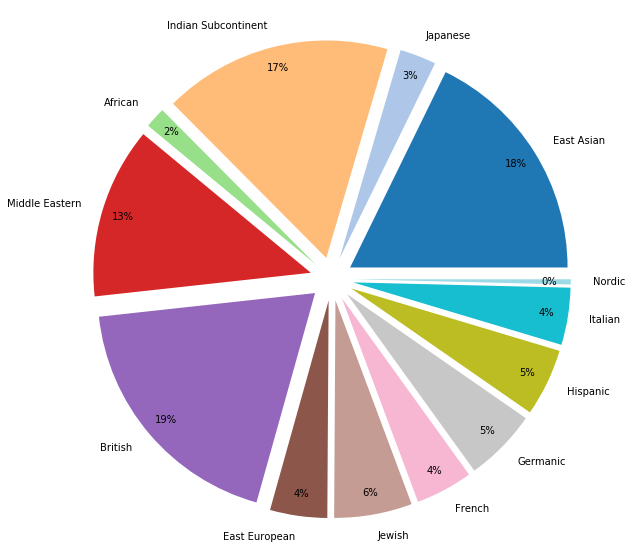

In [7]:
grbtr = btr.groupby('race').count()['uni_rank']
grbtr.index=['East Asian','Japanese', 'Indian Subcontinent','African', 'Middle Eastern', 'British', 'East European', 'Jewish', 'French', 'Germanic', 'Hispanic', 'Italian', 'Nordic']
nrace = grbtr.shape[0]
explode = 0.1*np.ones(nrace)

ax = grbtr.plot.pie(figsize=(10,10),
                    explode=explode,
                    autopct='%1.0f%%', 
                    pctdistance=0.9,
                    colormap='tab20')
ax.set_ylabel('');

University statistics

In [14]:
btr[(btr.uni_rank>-1)&(btr.uni_gender>-1)].describe()[['uni_rank','uni_gender']]

,uni_rank,uni_gender
count,218.000000,218.000000
mean,124.022936,0.468073
std,110.056770,0.114465
min,5.000000,0.150000
25%,31.000000,0.390000
50%,82.000000,0.510000
75%,189.000000,0.550000
max,428.000000,0.630000
